## Simple RNN

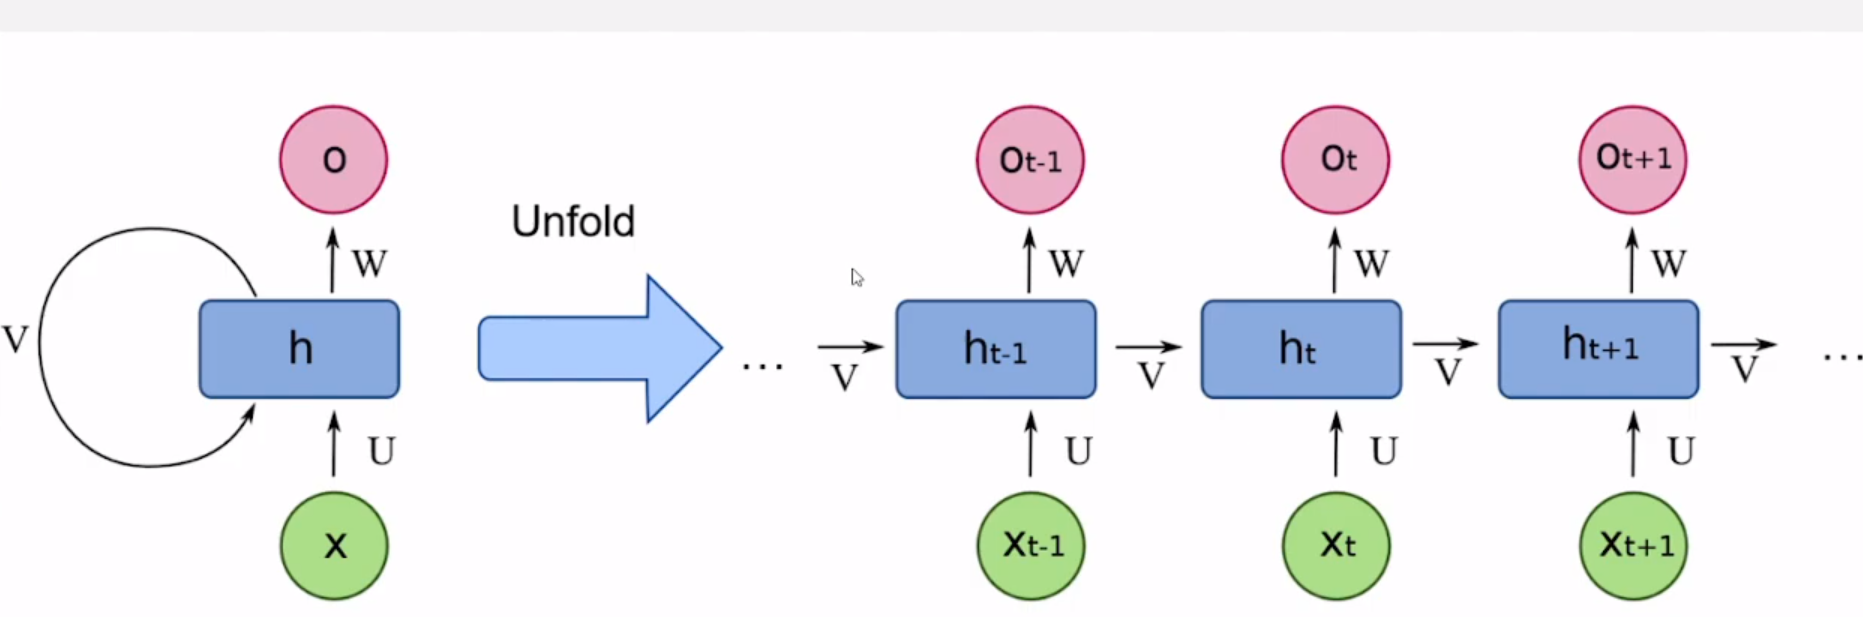

In [1]:
from IPython.display import Image
Image('images/simpleRNN.png')

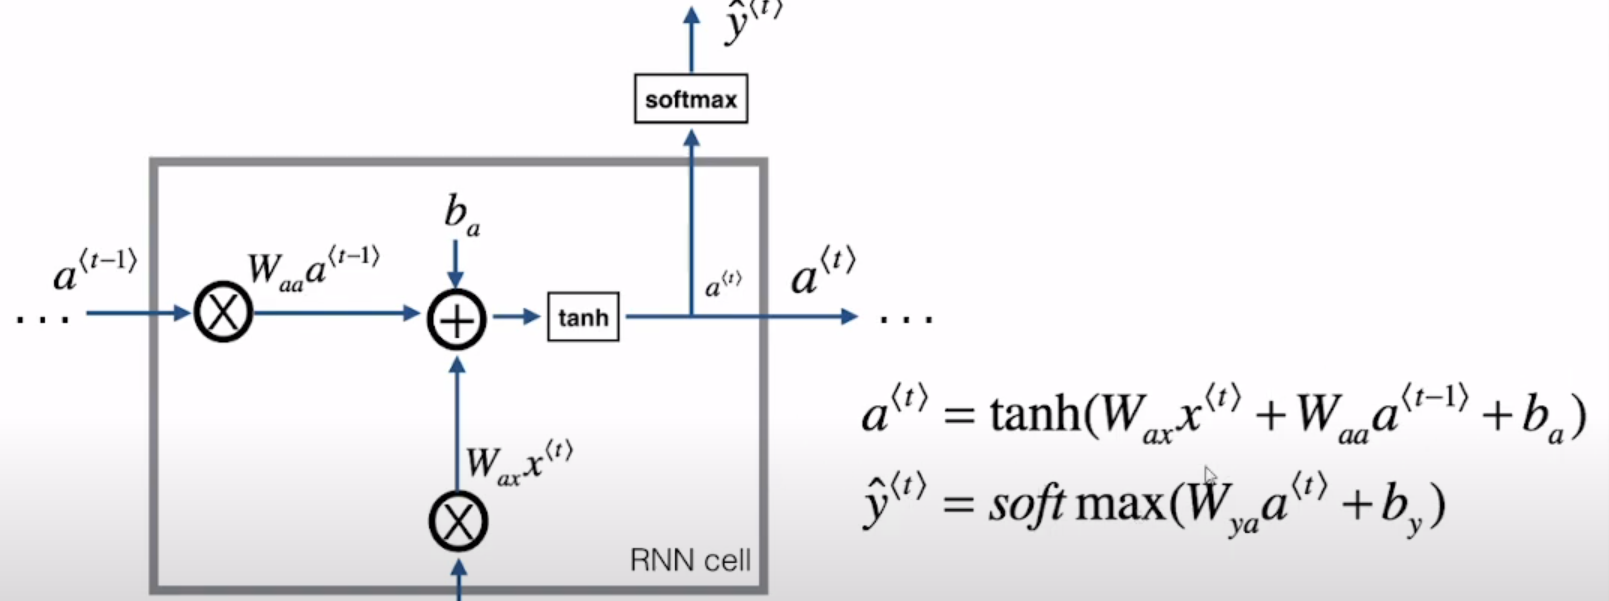

In [2]:
Image('images/cell.png')

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html

In [3]:
import torch
from torch import nn

In [4]:
class SimpleRNN(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers):
        super().__init__()
        self.rnn = nn.RNN(input_size,hidden_size,num_layers,batch_first=True)

    def forward(self,x):
        return self.rnn(x)

In [5]:
feature_size = 2
seq_length = 3
batch_size = 4
n_layers = 1
h_size = 5
model = SimpleRNN(feature_size,h_size,n_layers)

In [6]:
inp = torch.randn(batch_size,seq_length,feature_size)

In [7]:
inp.shape

torch.Size([4, 3, 2])

In [8]:
print(inp)

tensor([[[ 0.5173,  1.0629],
         [ 1.3333, -2.2774],
         [ 1.0439,  0.8762]],

        [[ 0.3321, -1.0021],
         [ 0.5281, -0.4886],
         [ 0.1740, -0.9359]],

        [[-0.6275, -0.7979],
         [-0.1783,  1.5077],
         [ 0.0535, -0.7069]],

        [[ 1.4054, -0.1843],
         [ 2.0663, -0.0768],
         [-0.2814,  1.3456]]])


In [9]:
output , hidden = model(inp)

In [10]:
print(output.shape)
print(hidden.shape)

torch.Size([4, 3, 5])
torch.Size([1, 4, 5])


In [11]:
print(output)
print(hidden)

tensor([[[ 0.3118,  0.5222, -0.5420,  0.6023, -0.6963],
         [-0.9276,  0.6922, -0.9260,  0.1515,  0.7069],
         [ 0.0338,  0.8401, -0.6356,  0.6165, -0.8530]],

        [[-0.4178,  0.5840, -0.5459,  0.4283,  0.1121],
         [-0.3958,  0.7709, -0.6489,  0.5995, -0.0802],
         [-0.4778,  0.7930, -0.6334,  0.6496,  0.3782]],

        [[-0.0205,  0.5471, -0.1778,  0.6103,  0.3689],
         [ 0.5156,  0.6015, -0.2647,  0.8557, -0.5285],
         [-0.5318,  0.5635, -0.7232,  0.6895,  0.6594]],

        [[-0.4602,  0.5913, -0.7827,  0.3089, -0.5729],
         [-0.6518,  0.8071, -0.9365,  0.2125, -0.6112],
         [ 0.6168,  0.7900, -0.5453,  0.7507, -0.4671]]],
       grad_fn=<TransposeBackward1>)
tensor([[[ 0.0338,  0.8401, -0.6356,  0.6165, -0.8530],
         [-0.4778,  0.7930, -0.6334,  0.6496,  0.3782],
         [-0.5318,  0.5635, -0.7232,  0.6895,  0.6594],
         [ 0.6168,  0.7900, -0.5453,  0.7507, -0.4671]]],
       grad_fn=<StackBackward0>)


In [12]:
print(list(model.named_parameters()))

[('rnn.weight_ih_l0', Parameter containing:
tensor([[-0.3565,  0.4037],
        [ 0.0464, -0.0473],
        [-0.4420,  0.0423],
        [-0.2331,  0.1366],
        [-0.3791, -0.4370]], requires_grad=True)), ('rnn.weight_hh_l0', Parameter containing:
tensor([[-0.2644,  0.2446,  0.3587, -0.3744, -0.0725],
        [-0.4218,  0.1868, -0.0956,  0.0785, -0.0170],
        [-0.2054,  0.0678,  0.3654, -0.1319,  0.3080],
        [-0.0430,  0.3712,  0.2713,  0.2563,  0.1224],
        [ 0.2641,  0.0544, -0.0463,  0.4424, -0.2706]], requires_grad=True)), ('rnn.bias_ih_l0', Parameter containing:
tensor([ 0.1380,  0.3100, -0.0877,  0.3611, -0.1819], requires_grad=True)), ('rnn.bias_hh_l0', Parameter containing:
tensor([-0.0600,  0.2957, -0.3356,  0.3110, -0.0176], requires_grad=True))]
